##  Plot the line graph between no. of Job postings with respect to year.
## Print the year and the number of job posting as integer value.
## Note: Year should be in ascending order.

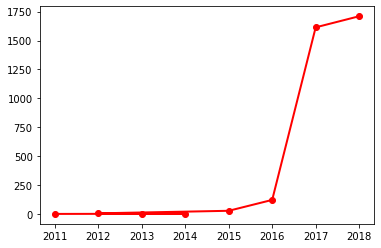

2011 2
2012 7
2013 3
2014 5
2015 29
2016 123
2017 1614
2018 1710


In [14]:
import matplotlib.pyplot as plt
import pandas as pd

def extract_year(s):
    return int(s[-4:])

df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/amazon_jobs_dataset.csv')
df['year'] = df['Posting_date'].apply(extract_year)
yr_counts = df.year.value_counts()

yr = yr_counts.index
job_counts = yr_counts.values
plt.plot(yr, job_counts, linewidth=2, marker='o', color='red')
plt.show()

for yr in range(2011,2019):
    print(yr, yr_counts.loc[yr])

## Plot the Bar graph between Month vs Job Openings.
## Print the month and the number of job posting as integer value.
## Order of months doesn't matter.

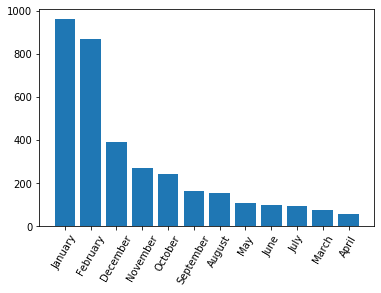

January 961
February 869
December 393
November 271
October 243
September 165
August 153
May 108
June 99
July 95
March 78
April 58


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

def extract_month(s):
    return s.split()[0]

df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/amazon_jobs_dataset.csv')
df['month'] = df['Posting_date'].apply(extract_month)
month_count = df.month.value_counts()

months = month_count.index
job_counts = month_count.values

plt.bar(months, job_counts)
plt.xticks(rotation=60)
plt.show()

for m in months:
    print(m, month_count.loc[m])


## Plot the Pie chart between Indian cities vs No. of jobs opening.
## Print the Indian cities and %age of Job distribution in India upto 2 decimal places.
## Note: %age of Job distribution should be in descending order.

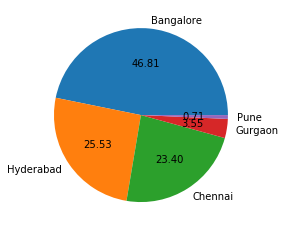

Bangalore 46.81
Hyderabad 25.53
Chennai 23.40
Gurgaon 3.55
Pune 0.71


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

def get_country(s):
    return s.split(',')[0].strip()
def get_city(s):
    return s.split(',')[-1].strip()

df = pd.read_csv('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/amazon_jobs_dataset.csv')
df['country'] = df['location'].apply(get_country)
df_India = df[df['country']=='IN'].copy(deep=True) #.copy(deep=True) to remove warning
df_India['cities'] = df_India['location'].apply(get_city)

city_count = df_India.cities.value_counts()
city = city_count.index
job_counts = city_count.values

plt.pie(job_counts, labels=city, autopct='%.2f')
plt.show()

total = sum(job_counts)
for i in city:
    per = (city_count.loc[i]*100)/total
    print(i, format(per, '.2f'))


## Plot the scatter graph between year vs No. of jobs opening related to Java.
## Print the year and number of Jobs opening in Java Profile.
## Note: Use the Keyword 'Java' or 'java' in Basic Qualification feature for finding the job opening related to Java Profile. Print the year in ascending order.

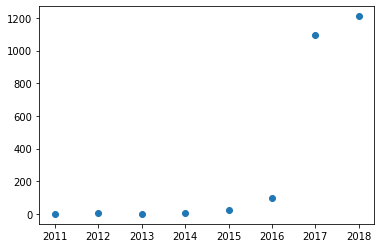

2012 6
2013 2
2014 4
2015 25
2016 95
2017 1093
2018 1210


In [17]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

java_jobs = {}
with open('C:/PYTHON/DataScience_Ninza/DataScience-and-ML/Datasets/amazon_jobs_dataset.csv', encoding='utf8') as file_obj:
    data = csv.DictReader(file_obj, skipinitialspace=True)
    for row in data:
        if 'Java' in row['BASIC QUALIFICATIONS'] or 'java' in row['BASIC QUALIFICATIONS']:
            date = row['Posting_date']
            year = int(date[-4:])
            java_jobs[year] = java_jobs.get(year,0) + 1

# Now create numpy arays of years and number of jobs
yrs = np.arange(2011,2019)
num_jobs = np.empty(8, dtype=int) # for yrs [2011,2018]
for i in range(8):
    yr = yrs[i]
    num_jobs[i] = java_jobs.get(yr,0)

plt.scatter(yrs, num_jobs)
plt.show()

for i in range(8):
    if num_jobs[i]>0:
        print(yrs[i],num_jobs[i])